In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


Question 1
* Determine the distribution of the actual event.
* Would you be concerned about bias due to imbalance?

In [2]:
actual = results['actual'].value_counts()
print(actual)

1.0    3000
0.0    2000
Name: actual, dtype: int64


The both values are not equal, which may indicate that the data is imbalanced.

Question 2
* Create a histogram that shows the distribution of the probabilities for the True and False classes.
* Describe what you observe.

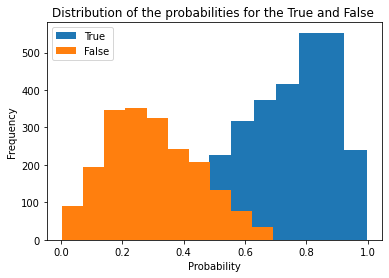

In [3]:
plt.hist(results[results['actual']==True]['prob'], label='True')
plt.hist(results[results['actual']==False]['prob'],label='False')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the probabilities for the True and False ');

As we can clearly see that the True side that is blue is toward more than concentrated towards 1 and has higher frequency. We can see the plot more tending towards true than the fales values . This model predicts that there are more probabilities for the True class. False has countable number of probabilites and comparetivly less than True. We can see from the histogram that the distribution of probabilities for the True and False classes is not equal, which may indicate that the data is imbalanced.

Question 3
* Create a simple confusion matrix. Use 0.5 as the threshold for whether an observation should be considered True or False.
* Comment on what you observe.

In [4]:
results['prob'] = results['prob'] >= 0.5

In [5]:
results

,actual,prob
0,0.0,False
1,1.0,True
2,1.0,True
3,1.0,False
4,1.0,True
...,...,...
4995,0.0,False
4996,1.0,True
4997,1.0,True
4998,0.0,False


In [6]:
TN, FP, FN, TP = 0, 0, 0, 0

In [7]:
for i in range(len(results['actual'])):
    if results.iloc[i]['actual'] == 0 and results.iloc[i]['prob'] == False:
        TN += 1
    elif results.iloc[i]['actual'] == 0 and results.iloc[i]['prob'] == True:
        FP += 1
    elif results.iloc[i]['actual'] == 1 and results.iloc[i]['prob']  == False:
        FN += 1
    elif results.iloc[i]['actual'] == 1 and results.iloc[i]['prob']==  True:
        TP += 1

True Positive (TP), False Positive (FP), False Negative (FN), and True Negative (TN)

In [8]:
TN, FP, FN, TP

(1790, 210, 377, 2623)

They are the values in the consfusion matrix which are obtained without any liberaries used. We can see that true positive values are more than any other values.

Question 4
* Calculate the accuracy, precision, and recall without using any pre-built functions.
* Which measure would you use if this was your model and why?

In [9]:
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy: 0.8826
Precision:  0.9258736321920226
Recall:  0.8743333333333333


Accuracy measure for classification models because it offers a thorough picture of the model's overall performance.

Question 5
* Construct a ROC curve plot.
* Comment on the fit of the model based on this chart.

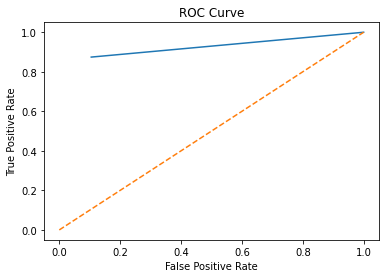

In [14]:
# Sort the data by predicted probability
results_sorted = results.sort_values('prob', ascending=False)

# Initialize empty arrays for TPR and FPR
True_Positive_Rate = []
False_Positive_Rate = []

# Calculate total number of positive and negative instances
positive_values = sum(results['actual'] == True)
negative_values = sum(results['actual'] == False)


# Iterate over the sorted data and calculate TPR and FPR for each threshold
for i in range(len(results_sorted)):
    # Predict True if the probability is above the threshold, False otherwise
    y_pred = np.where(results_sorted['prob'] >= results_sorted.iloc[i]['prob'], True, False)
    
    # Calculate TPR and FPR and append to the arrays
    tpr = sum((y_pred == True) & (results_sorted['actual'] == True)) / positive_values
    fpr = sum((y_pred == True) & (results_sorted['actual'] == False)) / negative_values
    True_Positive_Rate.append(tpr)
    False_Positive_Rate.append(fpr)

# Plot the ROC curve
plt.plot(False_Positive_Rate, True_Positive_Rate )
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC curve can be shown to be  near to the top left corner, demonstrating the model's effectiveness in separating the True and False classes.
Overall, the fit of the model seems to be good.